### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ву Ньят Нам
##### Группа:   НПИбд-01-17


## Москва 2020
***

### Вариант № 4


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing

Задание 1: Используя функционал библиотеки NumPy, постройте n значений случайных признаков X и Y, имеющих (двумерное) гауссовское распределение с математическим ожиданием a и корреляционной матрицей R.

In [3]:
x,y = np.random.multivariate_normal([ 0 , -1],[[1 , -0.5] , [-0.5 , 2]],1000).T

Вычислите и выведите на экран для построенных значений признаков X и Y математические ожидания, дисперсии, а также корреляцию между признаками.

In [4]:
print ("Мат ожидание СП X= ", np.mean(x))
print ("Мат ожидание СП Y= ", np.mean(y))
print ("Дисперсия СП X= ",np.var(x))
print ("Дисперсия СП Y= ",np.var(y))
print ("Корреляция = ", np.corrcoef(x, y)[0,1])

Мат ожидание СП X=  -0.0275226703658377
Мат ожидание СП Y=  -0.9598290374599635
Дисперсия СП X=  0.9926826795596366
Дисперсия СП Y=  2.0761715681012487
Корреляция =  -0.3933307482563819


Визуализируйте построенные данные на плоскости в виде точек. Визуализируйте математическое ожидание на плоскости в виде точки другого цвета и с другим маркером.

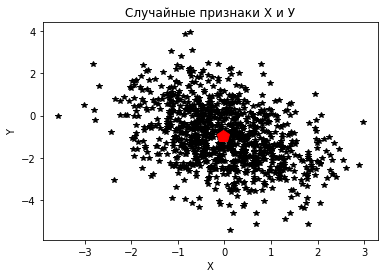

In [6]:
plt.plot (x, y,'*', c='k')
plt.plot (np.mean(x), np.mean(y),'p', ms=13, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Случайные признаки X и У')
plt.show()

Задание 2: Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
my_data = pd.read_csv(url, header=None, prefix="V")

print( "\n*** Начало данных:\n", my_data.head() ) 
print( "\n*** Конец данных:\n",  my_data.tail() )
summary = my_data.describe()                       
print( "\n*** Сводка данных:\n", summary)


*** Начало данных:
    V0   V1           V2   V3   V4    V5           V6   V7     V8    V9  ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

   V16   V17   V18   V19   V20  V21   V22 V23 V24    V25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]

*** Конец данных:
      V0  V1     V2      V3     V4    V5     V6   V7     V8     V9  ...  V16  \
200  -1  95  volvo     gas  

Проведите исследование набора данных, выявляя числовые и категориальные признаки. Если какие-то из признаков были неправильно классифицированы как категориальные, то преобразуйте их в числовые. Если в наборе присутствуют незаполненные значения, то игнорируйте такие записи

In [14]:
my_data.info()
my_data = my_data.select_dtypes(include=['int64'])
print("Число записей в датасете: ",len(my_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      205 non-null    int64  
 1   V1      205 non-null    object 
 2   V2      205 non-null    object 
 3   V3      205 non-null    object 
 4   V4      205 non-null    object 
 5   V5      205 non-null    object 
 6   V6      205 non-null    object 
 7   V7      205 non-null    object 
 8   V8      205 non-null    object 
 9   V9      205 non-null    float64
 10  V10     205 non-null    float64
 11  V11     205 non-null    float64
 12  V12     205 non-null    float64
 13  V13     205 non-null    int64  
 14  V14     205 non-null    object 
 15  V15     205 non-null    object 
 16  V16     205 non-null    int64  
 17  V17     205 non-null    object 
 18  V18     205 non-null    object 
 19  V19     205 non-null    object 
 20  V20     205 non-null    float64
 21  V21     205 non-null    object 
 22  V2

V0  =  1.5507890961262554
V13  =  271107.8743185079
V16  =  1734.1139167862266
V23  =  42.79961740793879
V24  =  47.42309899569584


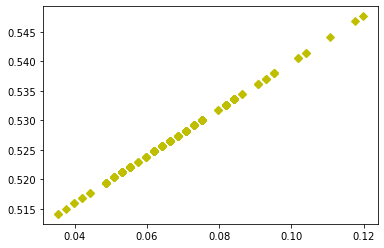

In [17]:
for i in my_data:
    print (i,' = ', my_data.var()[i])
Data = preprocessing.normalize(my_data['V24'].values.reshape(1, -1))
plt.plot(Data, scipy.stats.norm.cdf(Data), 'D', c='y')
plt.savefig('v04.png')
plt.show()

In [27]:
pip install seaborn

     |████████████████████████████████| 283 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Text(33.0, 0.5, 'PDF')

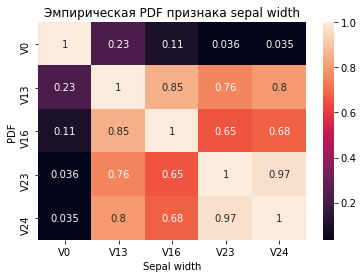

In [28]:
import seaborn as sns

sns.heatmap(abs(my_data.corr()), annot = True)
plt.hist(my_data['V13'], color = 'blue', edgecolor = 'black',bins = 20, density=True)

plt.title('Эмпирическая PDF признака sepal width')
plt.xlabel('Sepal width')
plt.ylabel('PDF')

Вычислите и выведите на экран для указанных выше двух признаков математические ожидания, дисперсии, а также корреляцию между признаками.

In [29]:
print ("Мат ожидание X= ", np.mean(my_data['V24']))
print ("Мат ожидание Y= ", np.mean(my_data['V13']))
print ("Дисперсия X= ",np.var(my_data['V24']))
print ("Дисперсия Y= ",np.var(my_data['V13']))
print("Корреляция = ", np.corrcoef(my_data['V24'], my_data['V13'])[0,1])

Мат ожидание X=  30.75121951219512
Мат ожидание Y=  2555.5658536585365
Дисперсия X=  47.19176680547293
Дисперсия Y=  269785.39688280784
Корреляция =  -0.7974647922811803
